<a href="https://colab.research.google.com/github/00016668/Machine-Learning-Projects/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://github.com/RyanNolanData/YouTubeData/raw/main/500hits.csv', encoding='latin-1')
df.head()

,PLAYER,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
0,Ty Cobb,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,178,0.366,1
1,Stan Musial,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,31,0.331,1
2,Tris Speaker,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,129,0.345,1
3,Derek Jeter,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,97,0.310,1
4,Honus Wagner,21,2792,10430,1736,3430,640,252,101,0,963,327,722,15,0.329,1


In [3]:
df = df.drop(columns=['PLAYER', 'CS'])
X = df.iloc[:,0:13]
y = df.iloc[:,13]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15)

In [5]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [6]:
rf.score(X_test, y_test)

0.8709677419354839

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90        59
           1       0.92      0.71      0.80        34

    accuracy                           0.87        93
   macro avg       0.89      0.84      0.85        93
weighted avg       0.88      0.87      0.87        93



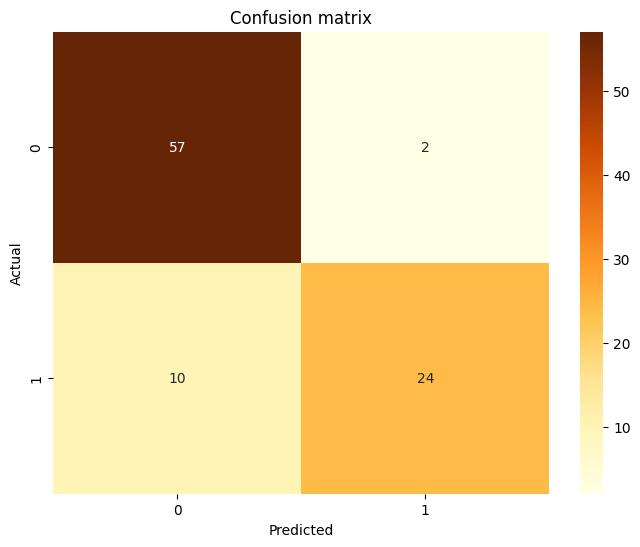

In [22]:
import seaborn as sns
import matplotlib.pyplot  as plt
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='YlOrBr', annot=True, xticklabels=['0','1'], yticklabels=['0','1'])
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
importance = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['Importance'])
importance.sort_values(by='Importance', ascending=False)

,Importance
R,0.174371
BA,0.126327
H,0.125418
AB,0.085409
RBI,0.074515
2B,0.067990
3B,0.061759
HR,0.056869
G,0.055476
SO,0.055129


In [17]:
rf2 = RandomForestClassifier(n_estimators=1000,
                             criterion='entropy',
                             min_samples_split=10,
                             max_depth=14,
                             random_state=42)

In [18]:
rf2.fit(X_train, y_train)
y_pred2 = rf2.predict(X_test)

In [19]:
rf2.score(X_test, y_test)

0.8602150537634409

In [24]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        59
           1       0.92      0.68      0.78        34

    accuracy                           0.86        93
   macro avg       0.88      0.82      0.84        93
weighted avg       0.87      0.86      0.85        93



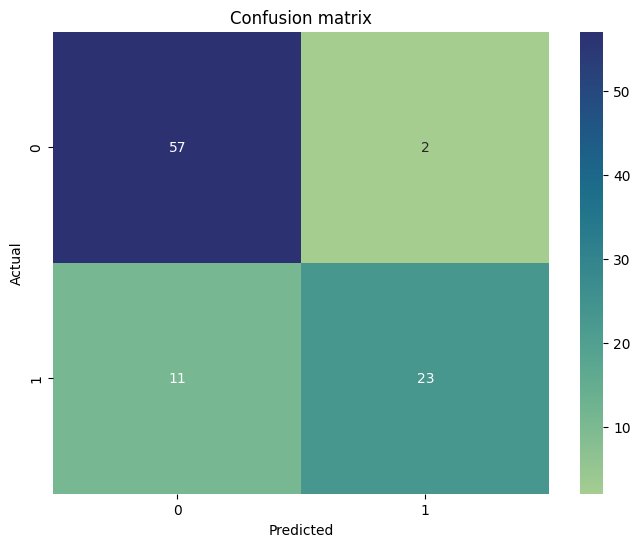

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred2), cmap='crest', annot=True, xticklabels=['0','1'], yticklabels=['0','1'])
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()